In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from DataLoader_DT import MyDataloader
from Engine_DT import Engine
from reformat_data import *

In [5]:
data_people = people_reformat(r"/mnt/Data1/Python_Projects/Pure-Python/P5/01-Thesis/data/Shiraze94_fa/People.xlsx")
data_family = family_reformat(r"/mnt/Data1/Python_Projects/Pure-Python/P5/01-Thesis/data/Shiraze94_fa/Family.xlsx")
data_trips = trips_reformat(r"/mnt/Data1/Python_Projects/Pure-Python/P5/01-Thesis/data/Shiraze94_fa/Trips.xlsx")

In [6]:
seed = 1
dataloader = MyDataloader(data_list=[data_people, data_family, data_trips]
                          ,seed=seed)
dataloader.data

,destination_area_code,origin_area_code,origin_region_code,start_hour,start_minute,hourly_correction_factor,trip_distance,previous_trip_code,gender,age,...,job_5,job_6,job_7,job_8,job_9,job_10,job_11,job_12,job_13,job_14
0,127,252,14,10,15,1.7,8499.15,0,1,44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,251,128,7,14,30,1.7,7693.01,120670,1,44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,169,171,14,7,30,1.0,2421.68,0,1,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,170,170,14,8,35,1.0,1677.50,100368,1,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,171,14,12,37,1.0,7807.36,100370,1,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93936,26,30,1,18,30,1.0,1141.41,107678,1,21,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93937,29,27,1,9,30,1.0,1268.87,0,1,21,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93938,26,30,1,14,0,1.0,1141.41,107672,1,21,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93939,29,27,1,17,20,1.0,1268.87,107673,1,21,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
model = Engine(data=dataloader.data)
model.fit()

Accuracy for Train is 0.01803665120523154
Accuracy for Test is 0.01916116670215031


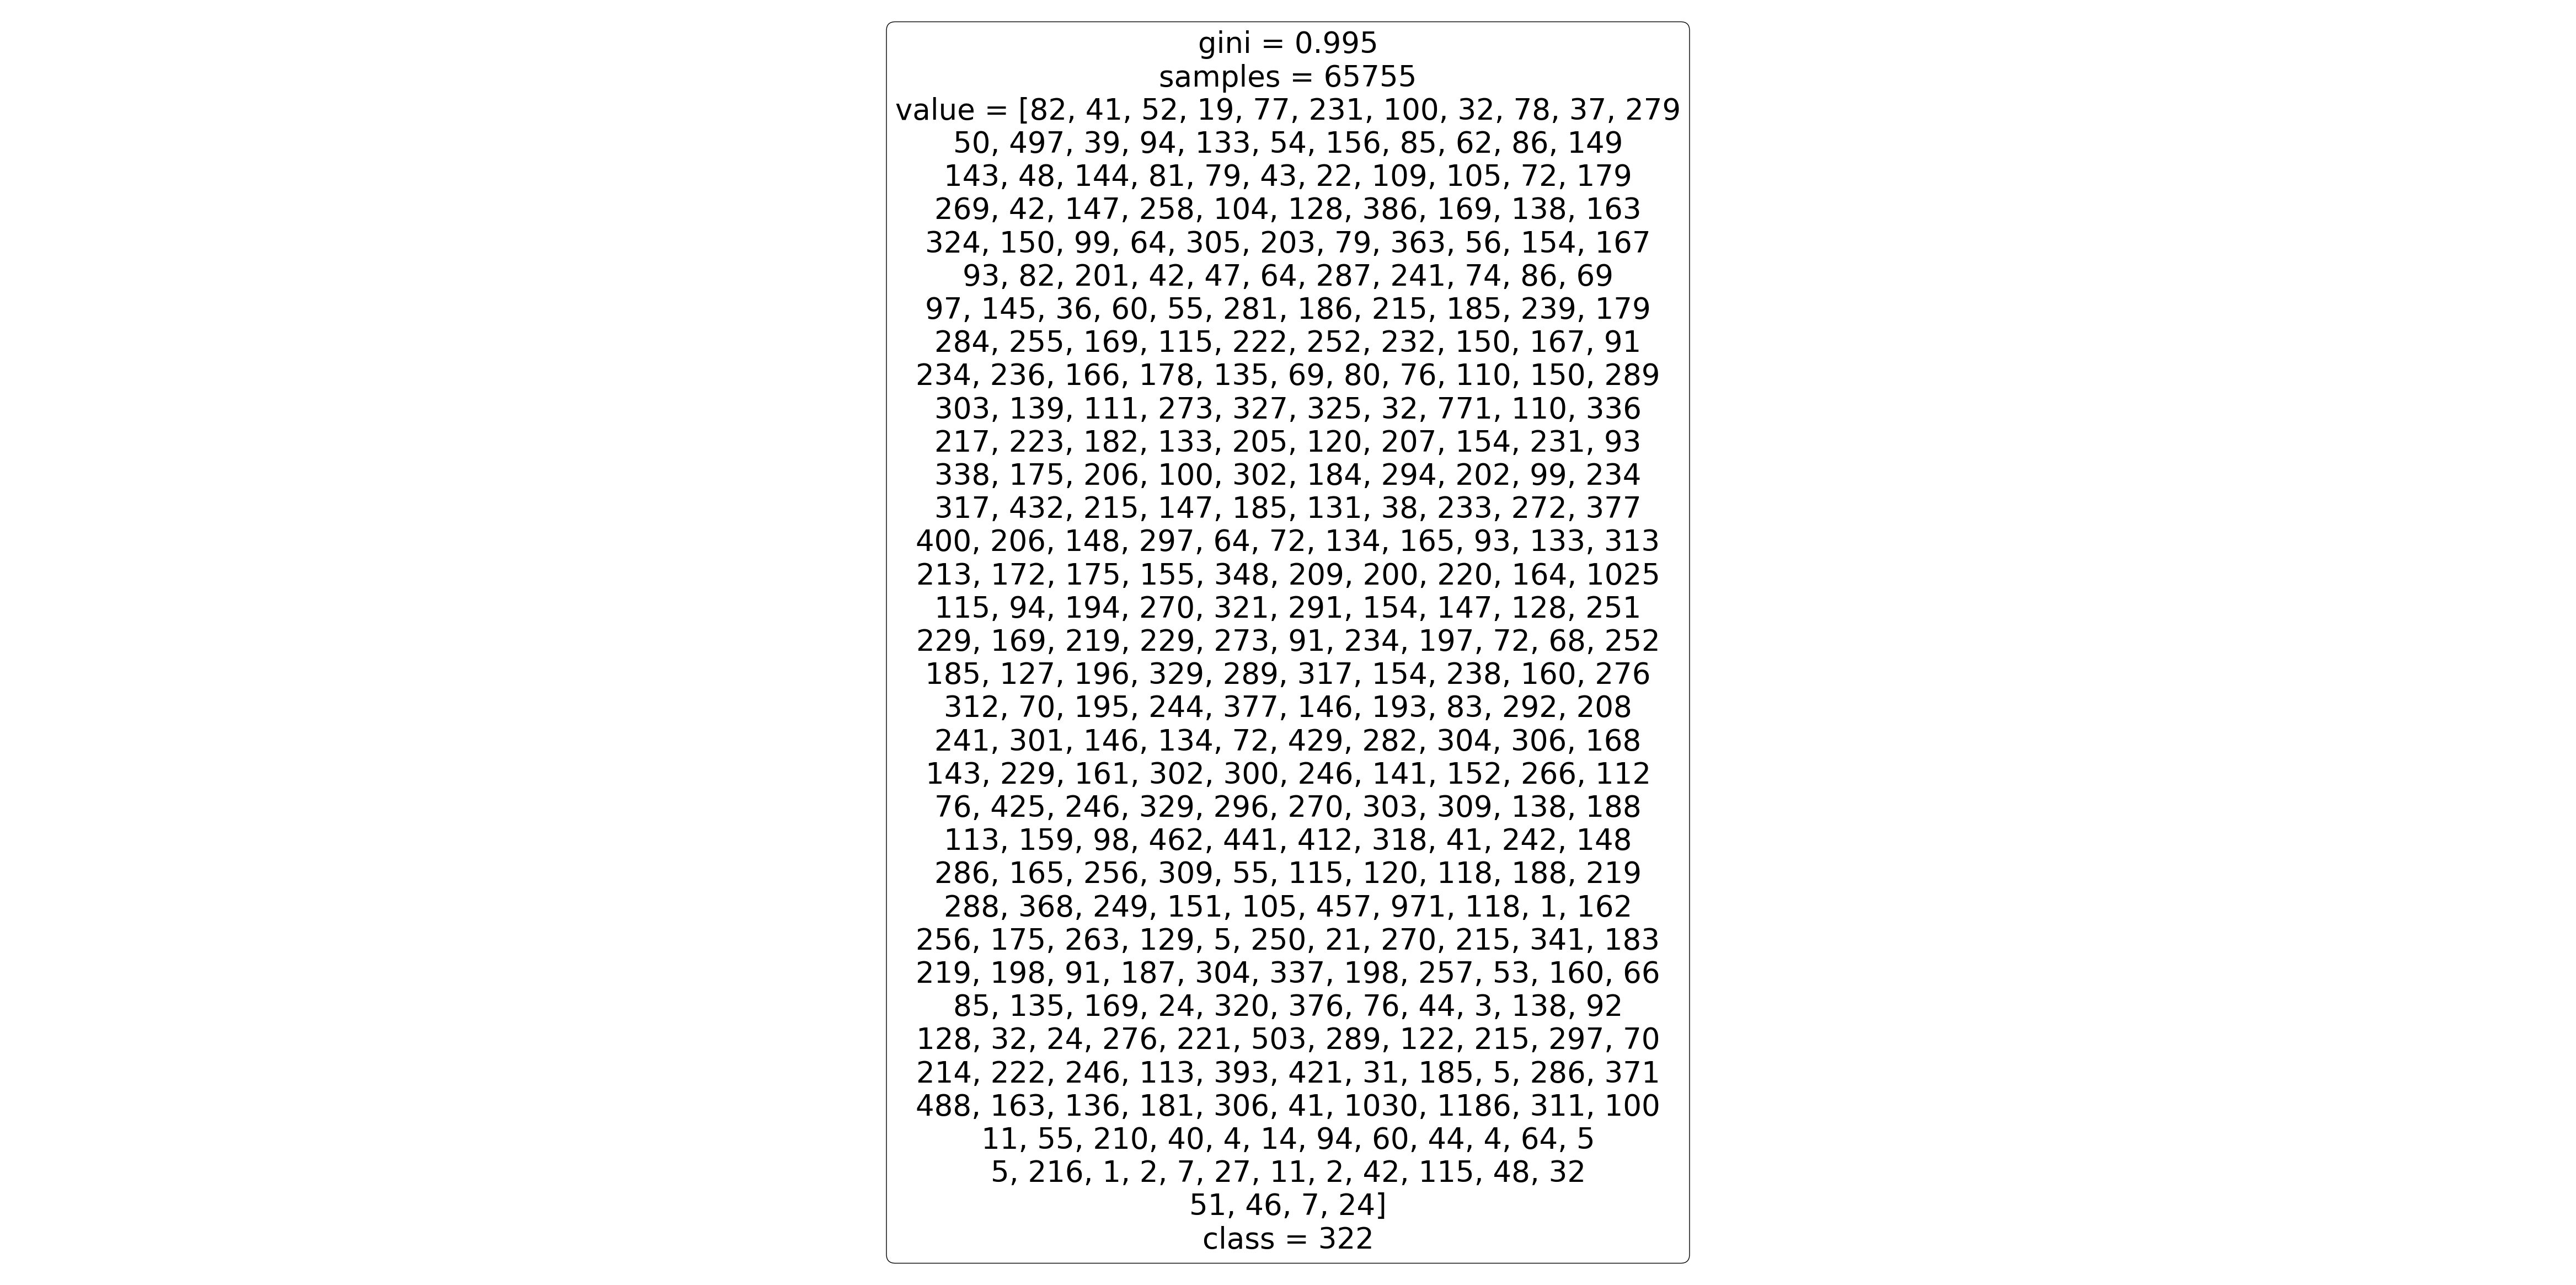

In [21]:
model.pre_tree(if_plot_tree=True, if_confusion_matrix=False, alpha=0.01)

In [ ]:
model.find_alpha_for_pruning(plot_loss=False)

In [ ]:
model.cross_validation_to_find_best_alpha()

In [ ]:
features1 = {"Pclass":[1, 2, 3]}
features2 = {"Age": sorted(list(model.data["Age"].unique()))}
features3 = {"Sex": [0, 1]}
features4 = {"SibSp":[0, 1, 2, 3, 4, 5, 6, 7, 8]}
features5 = {"Fare": sorted(list(model.data["Fare"].unique()))}

model.partial_dependence_plot(features=features5)

In [ ]:
model.individual_conditional_expectation(features=features1)

In [10]:
features = ["Pclass", "Age", "Sex", "SibSp", "Fare"]
model.accumulated_local_effects_plot(features=[features[4]], n=6)

KeyError: 'Fare'